In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('wine.data', header = None)

In [3]:
df.shape

(178, 14)

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
desc = pd.DataFrame({'Null' : df.isnull().sum(),
                     'Null_%' : 100*df.isnull().sum()/df.shape[0],
                     'Unique' : df.nunique(),
                     'Unique_%' : 100*df.nunique()/df.shape[0],
                     'Dtypes' : df.dtypes
                    })

In [8]:
desc

,Null,Null_%,Unique,Unique_%,Dtypes
0,0,0.0,3,1.685393,int64
1,0,0.0,126,70.786517,float64
2,0,0.0,133,74.719101,float64
3,0,0.0,79,44.382022,float64
4,0,0.0,63,35.393258,float64
5,0,0.0,53,29.775281,int64
6,0,0.0,97,54.494382,float64
7,0,0.0,132,74.157303,float64
8,0,0.0,39,21.910112,float64
9,0,0.0,101,56.741573,float64


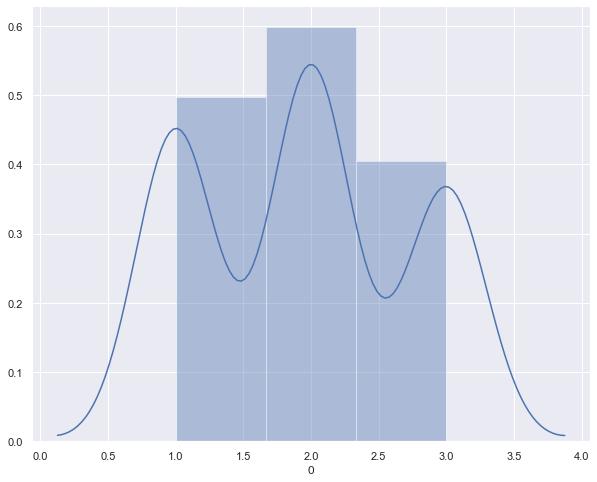

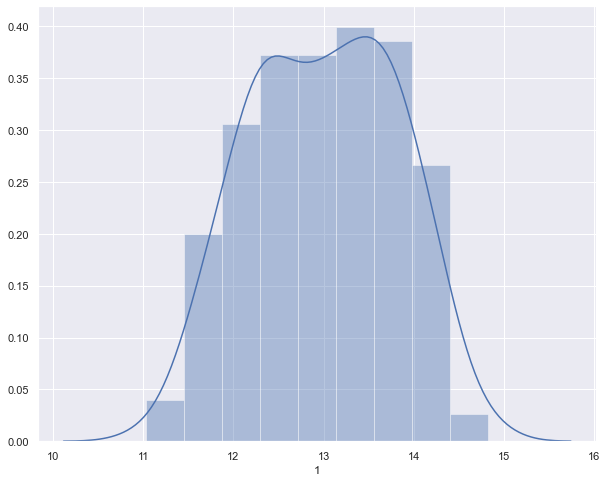

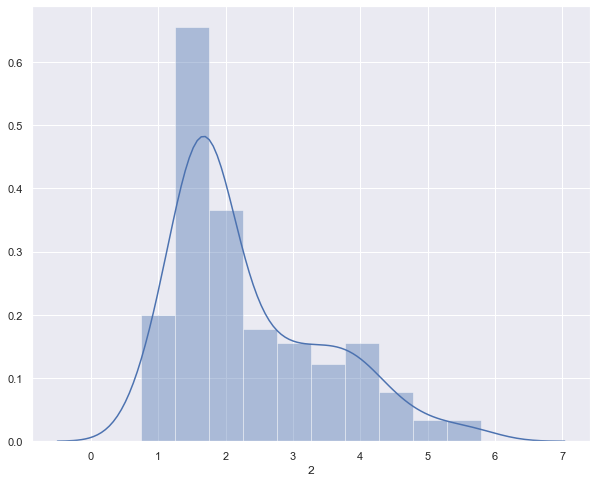

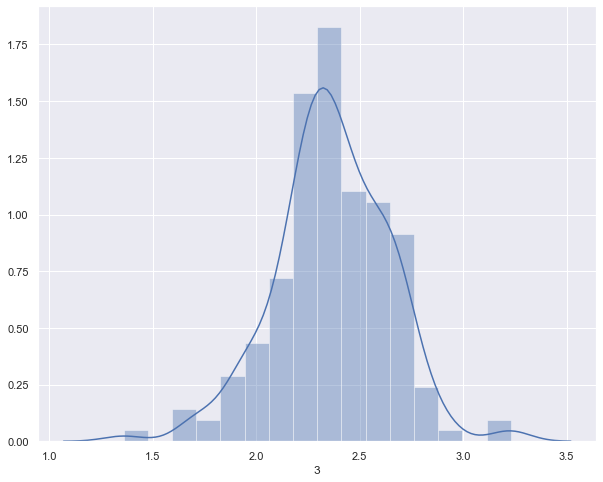

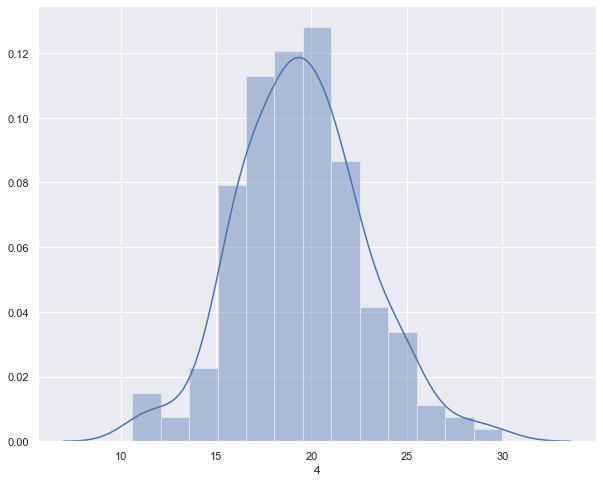

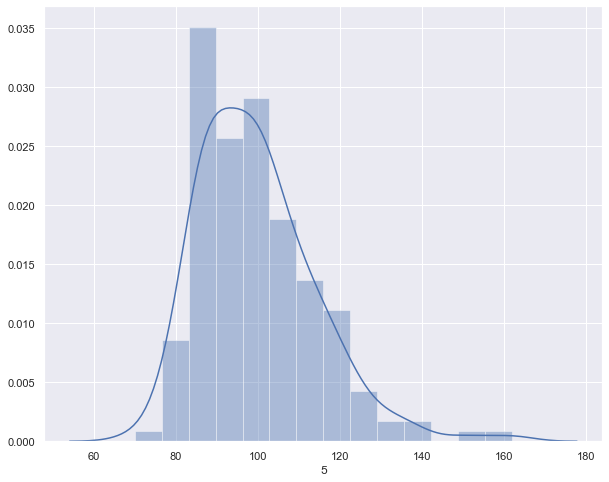

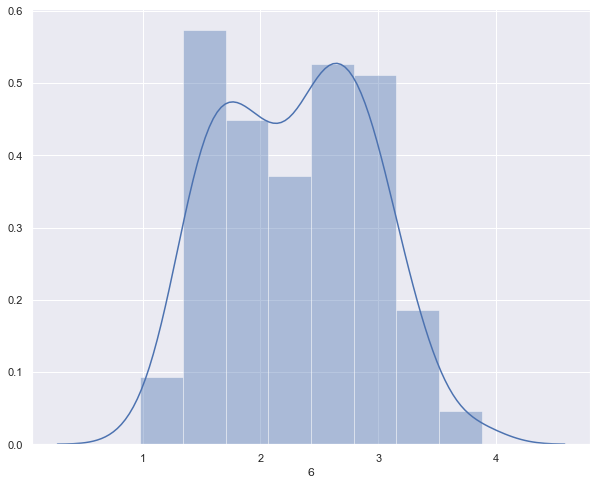

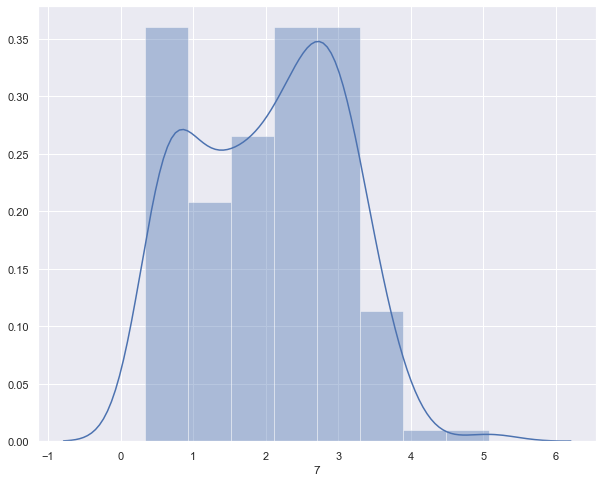

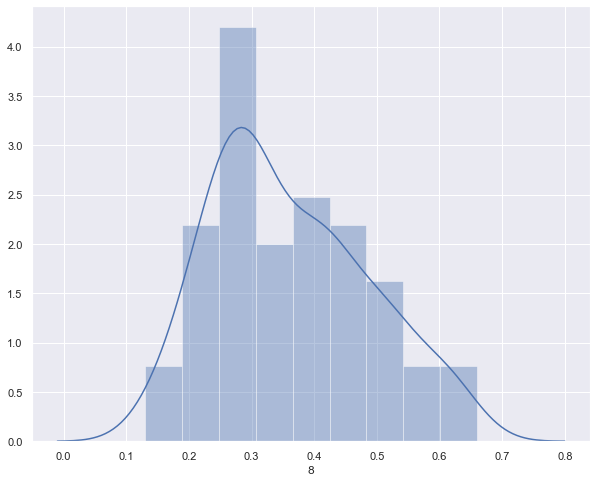

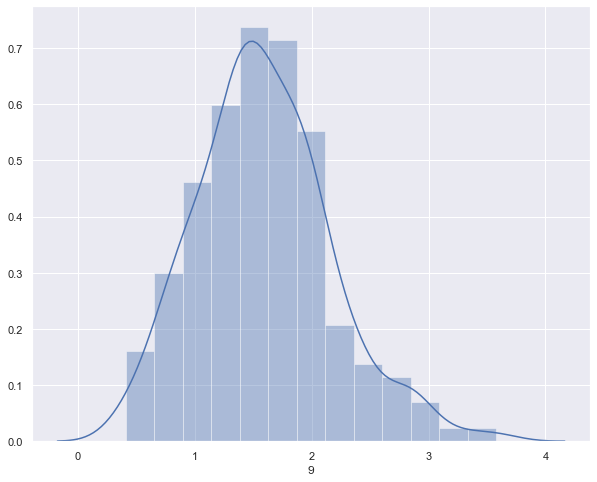

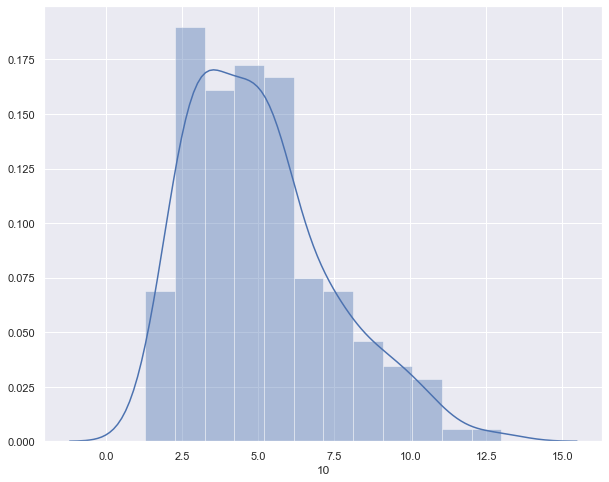

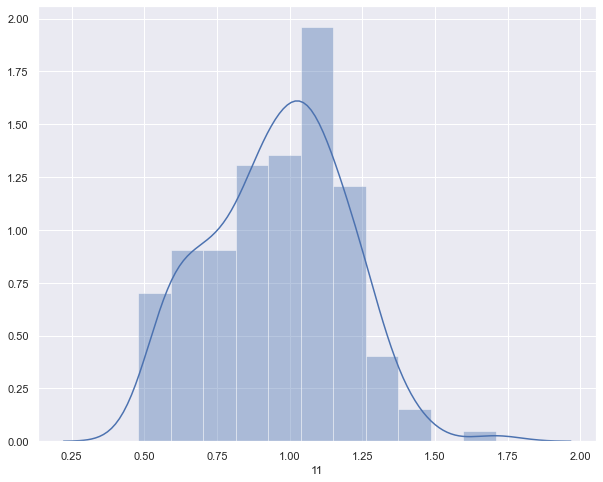

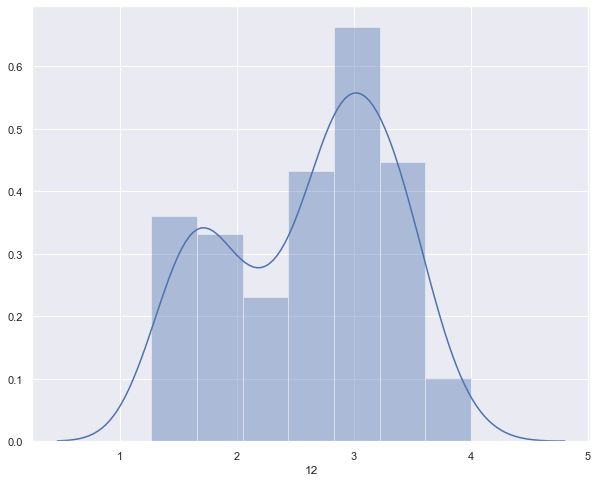

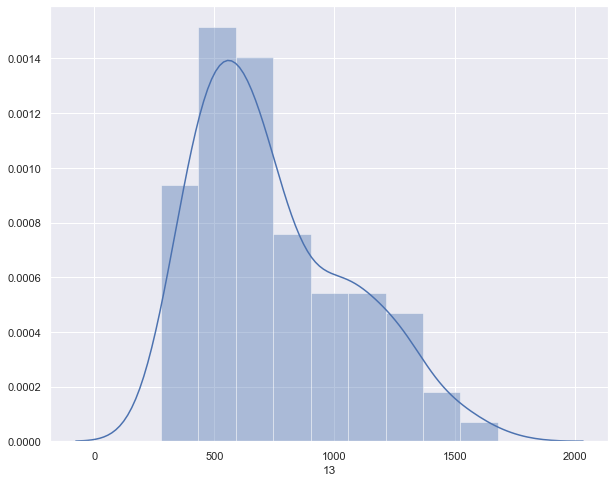

In [9]:
for column in df.columns:
    plt.figure(figsize = (10, 8))
    sns.distplot(df[column])
    plt.show()

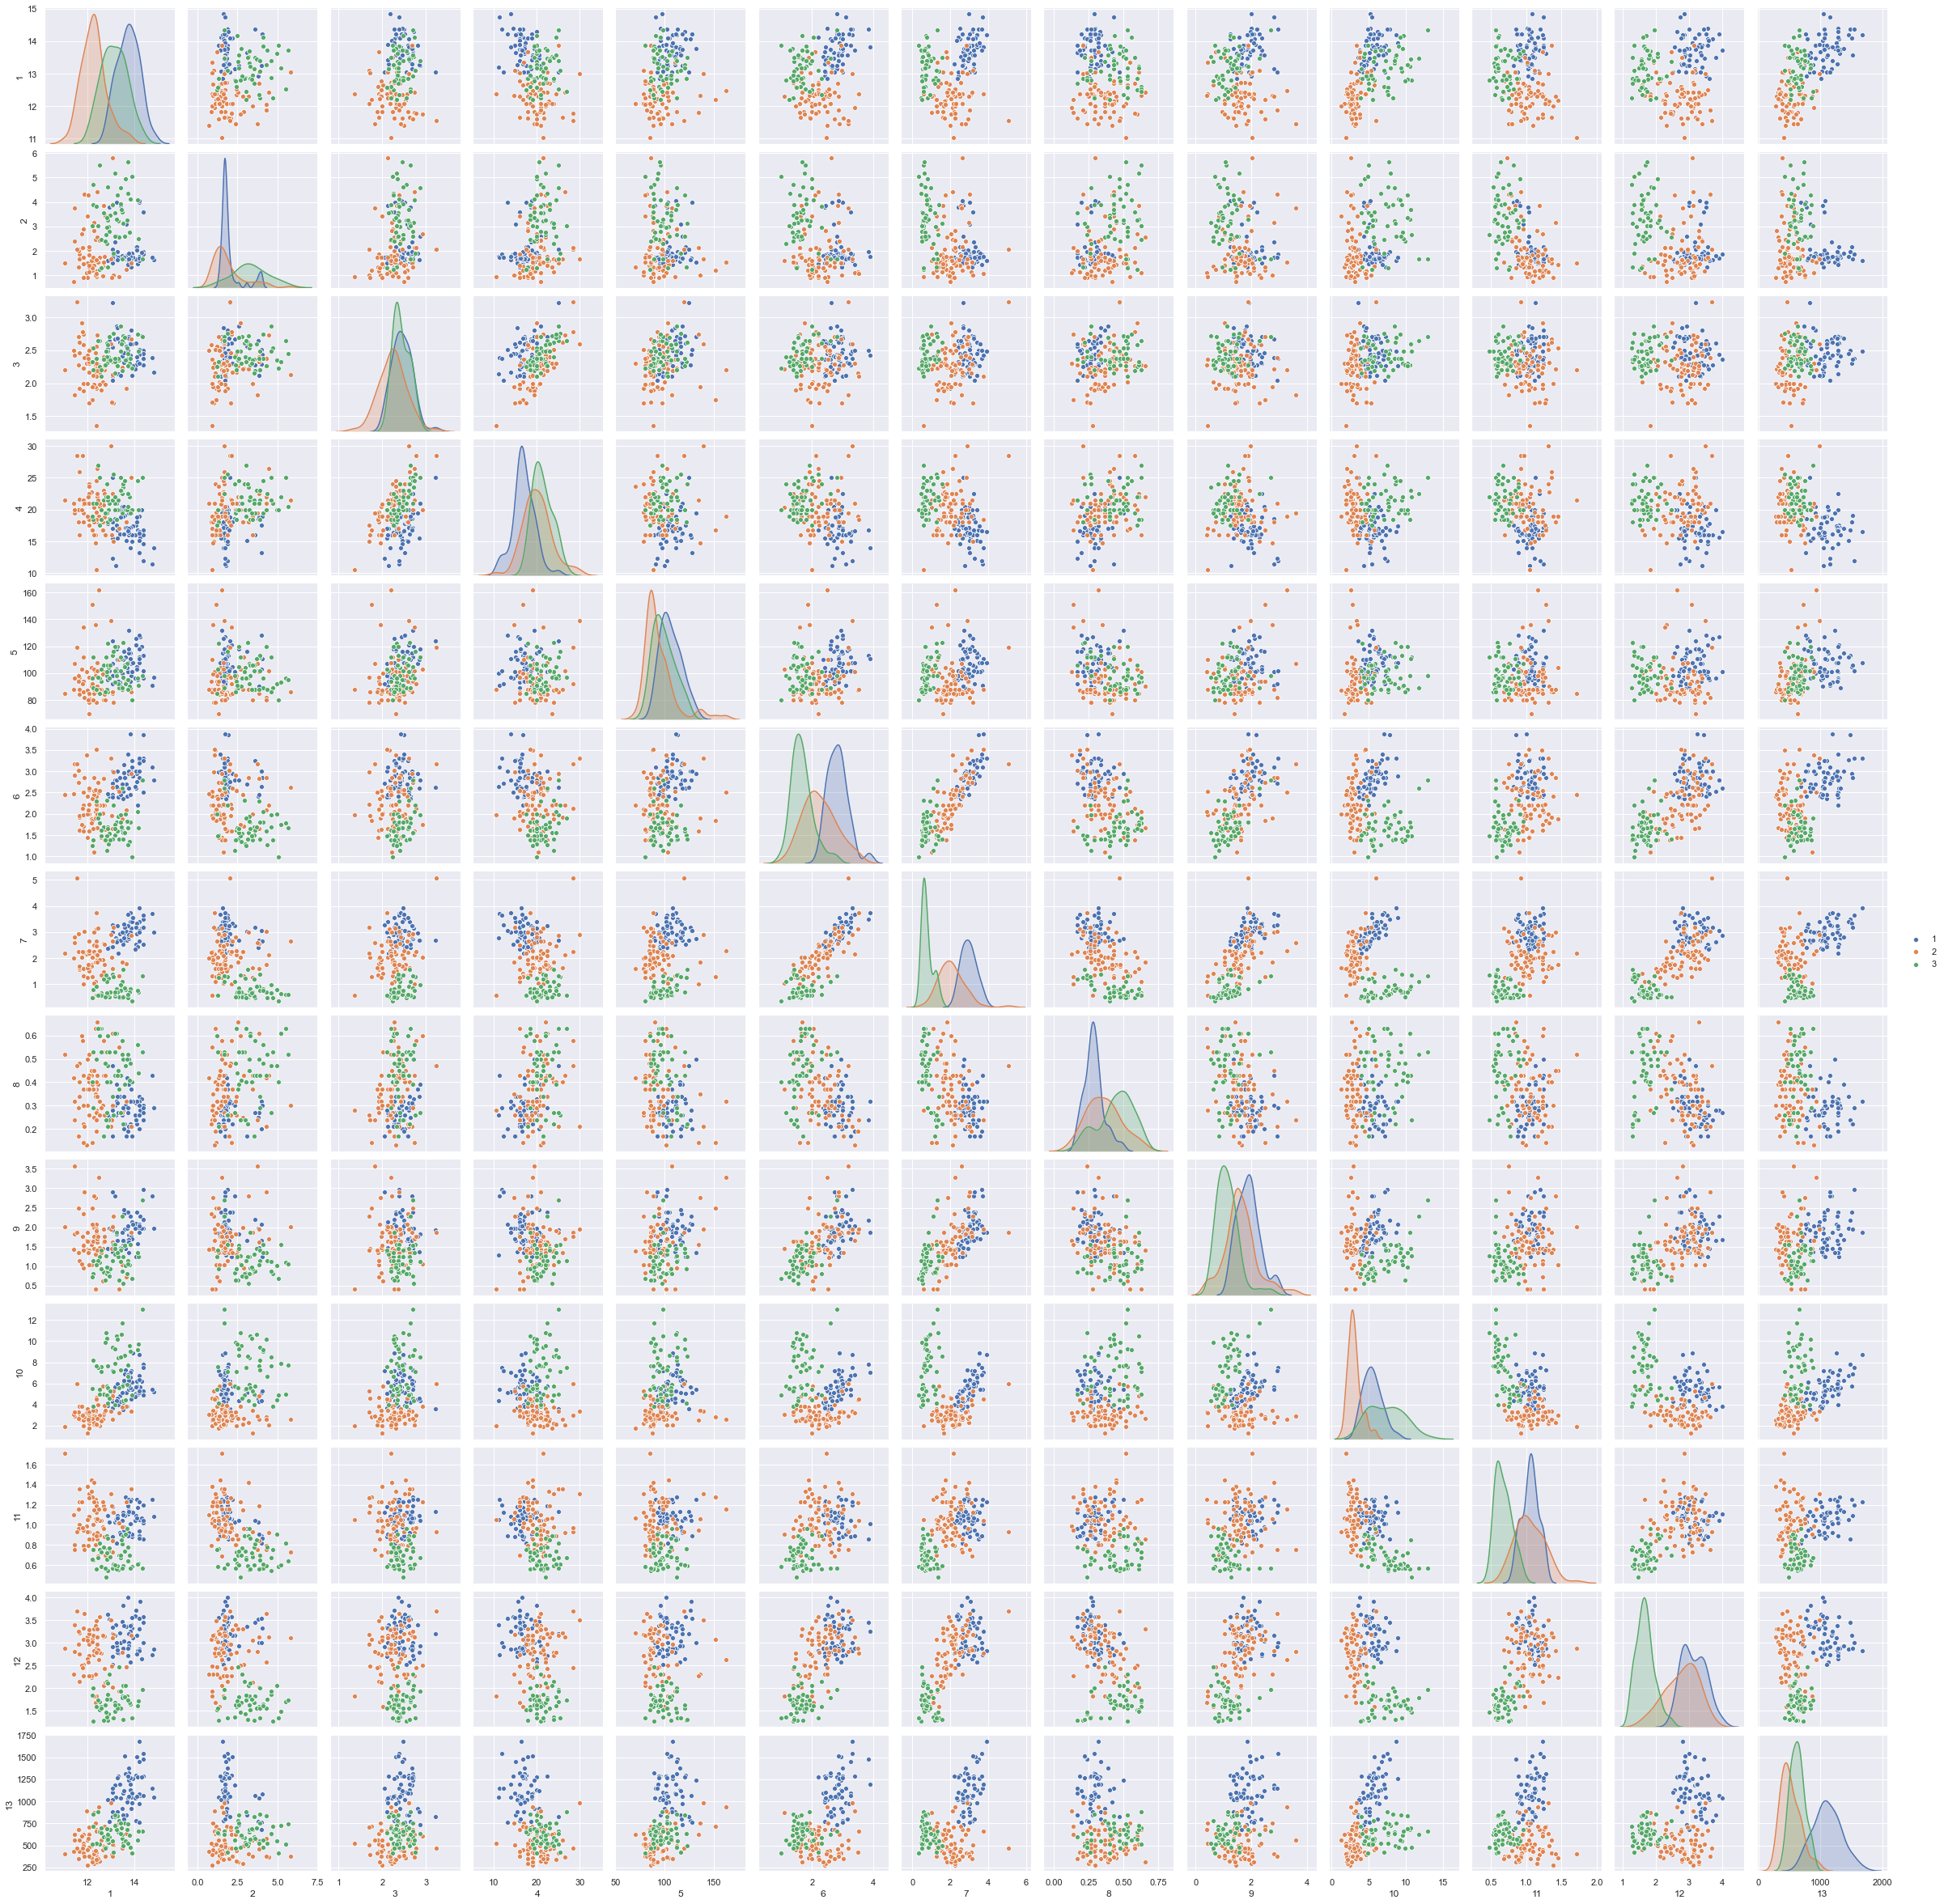

In [10]:
sns.pairplot(data = df, hue = list(df.columns)[0])

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [13]:
RFC = RandomForestClassifier(max_depth = 4)

In [14]:
Ada_model = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 3), n_estimators = 50)

In [15]:
log_reg = LogisticRegression(penalty = 'l2', solver = 'lbfgs', max_iter = 5000)

In [16]:
X, y = df.iloc[:, 1 : ], df.iloc[:, 0]

In [17]:
#from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)

In [18]:
RFC.fit(X_train, y_train)
rfc_score = RFC.score(X_test, y_test)
rfc_score

0.9722222222222222

In [19]:
Ada_model.fit(X_train, y_train)
Ada_score = Ada_model.score(X_test, y_test)
Ada_score

0.9722222222222222

In [20]:
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9722222222222222

In [21]:
from sklearn.model_selection import learning_curve

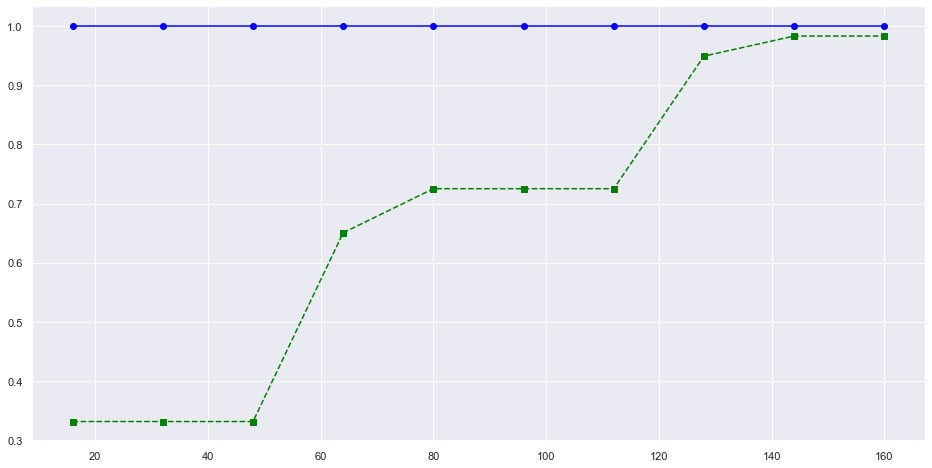

In [22]:
train_sizes, train_scores, test_scores = learning_curve(estimator = RFC, X = X, y = y, train_sizes = np.linspace(0.1, 1, 10), cv = 10, n_jobs = -1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(train_sizes, train_mean, linestyle = '-', marker = 'o', color = 'blue')
plt.plot(train_sizes, test_mean, marker = 's', linestyle = '--', color = 'green')
plt.show()

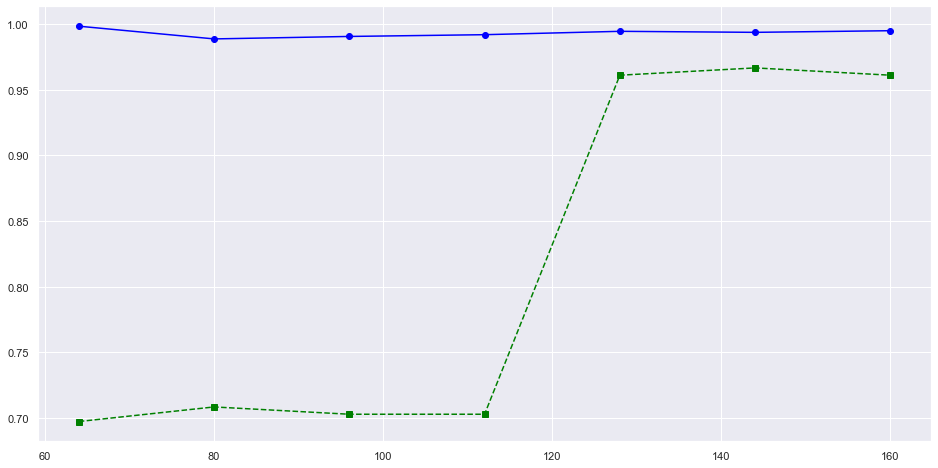

In [23]:
train_sizes, train_scores, test_scores = learning_curve(estimator = log_reg, X = X, y = y, train_sizes = np.linspace(0.1, 1, 10), cv = 10, n_jobs = -1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(train_sizes, train_mean, linestyle = '-', marker = 'o', color = 'blue')
plt.plot(train_sizes, test_mean, marker = 's', linestyle = '--', color = 'green')
plt.show()

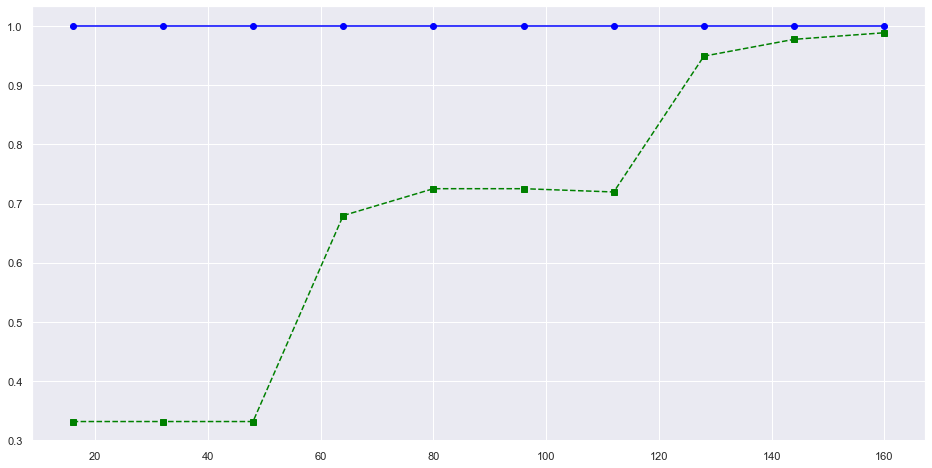

In [24]:
train_sizes, train_scores, test_scores = learning_curve(estimator = Ada_model, X = X, y = y, train_sizes = np.linspace(0.1, 1, 10), cv = 10, n_jobs = -1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (16, 8))
plt.plot(train_sizes, train_mean, linestyle = '-', marker = 'o', color = 'blue')
plt.plot(train_sizes, test_mean, marker = 's', linestyle = '--', color = 'green')
plt.show()

In [25]:
from sklearn.metrics import classification_report, roc_auc_score

In [26]:
def result(model, X_test, y_test):
    yhat = model.predict(X_test)
    #print('roc_score: '.format(roc_auc_score(y_test, yhat, multi_class = 'ovo')))
    print(classification_report(y_test, yhat))

In [27]:
result(Ada_model, X_test, y_test)

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [28]:
result(log_reg, X_test, y_test)

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [29]:
result(RFC, X_test, y_test)

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

